# Машинне навчання

## Редукування даних: метод SVD

###  Лабораторна робота 5


**_Студентка Пороскун Олена. Група ПМ.м-21_**

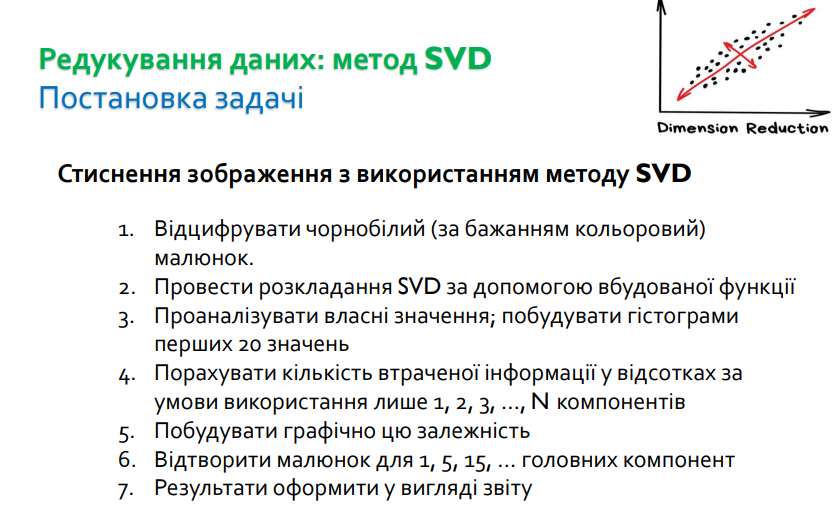

_______________________________________________________________________________________________________________

In [1]:
!pip install opencv-python
!pip install imutils

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import os

# Import opencv
import cv2

In [3]:
import warnings
warnings.filterwarnings('ignore')

* **1**

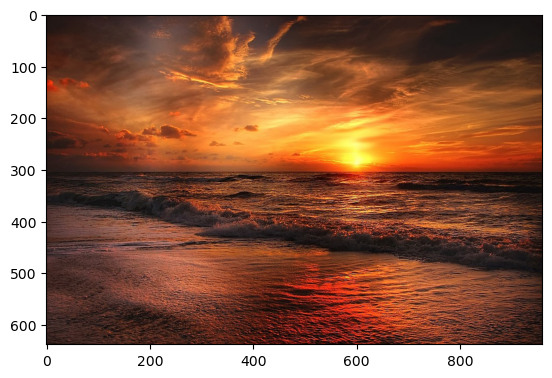

In [4]:
name_img = 'beach.jpg'
img_orig = mpimg.imread(name_img)
imgplot = plt.imshow(img_orig)

* **2-3**

In [5]:
def fun_matrixs(name_img, components):
    # Завантажте вхідне зображення і перетвориіть в чорнобіле
    img = cv2.imread(name_img, 0)
    
    original_shape = img.shape
    print('Розміри початкового зображення:', original_shape)

    U, S, V = np.linalg.svd(img)
    print('\nРозміри матриць отриманих з np.linalg.svd(...):\n U.shape, S.shape, V.shape')
    print(U.shape, S.shape, V.shape)

    first = [min(np.shape(img))]
    #comps = [first, 200, 50, 15, 5, 1]
    comps = first + components
    print('\nСписок числа компонент:', comps)
    
    matr = []
    for i in range(len(comps)):
        low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]     
        #print(np.shape(low_rank))
        matr.append(low_rank)
    
    return matr

In [6]:
components0 = [200, 100, 50, 25, 15, 10, 5, 4, 3, 2, 1]
matr0 = fun_matrixs(name_img, components0)
print(np.shape(matr0))

Розміри початкового зображення: (638, 960)

Розміри матриць отриманих з np.linalg.svd(...):
 U.shape, S.shape, V.shape
(638, 638) (638,) (960, 960)

Список числа компонент: [638, 200, 100, 50, 25, 15, 10, 5, 4, 3, 2, 1]
(12, 638, 960)


In [7]:
matr0_ = matr0[0]
covmat = np.cov(matr0_)
w, v = np.linalg.eig(covmat)

In [8]:
d2 = {'Власні значення': w[:20]}
df1 = pd.DataFrame(d2)
display(df1.head())

,Власні значення
0,310432.929103
1,116198.452046
2,71619.792069
3,21235.600645
4,16093.473605


Text(0, 0.5, 'Власні значення коваріаційної матриці')

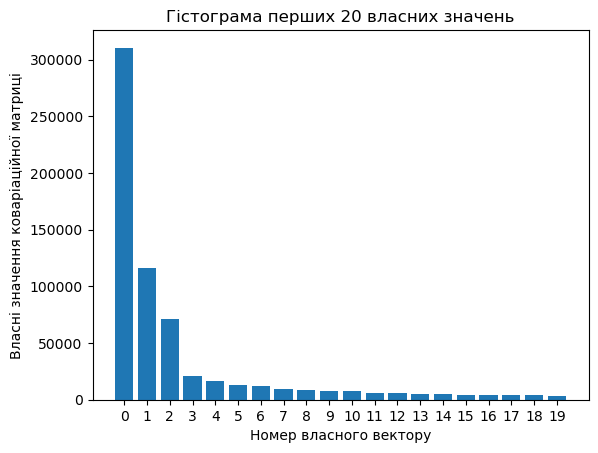

In [9]:
numbers = np.arange(20)
plt.bar(numbers, height=df1['Власні значення'])
plt.xticks(numbers)
plt.title('Гістограма перших 20 власних значень')
plt.xlabel('Номер власного вектору')
plt.ylabel('Власні значення коваріаційної матриці')

* **4**

In [10]:
def plot_components(name_img):
    # Завантажте вхідне зображення і перетвориіть в чорнобіле
    img = cv2.imread(name_img, 0)
    original_shape = img.shape
    print('Розміри початкового зображення:', original_shape)

    # Отримання svd
    U, S, V = np.linalg.svd(img)

    print('\nРозміри матриць отриманих з np.linalg.svd(...):\n U.shape, S.shape, V.shape')
    print(U.shape, S.shape, V.shape)

    # зображення з різною кількістю компонентів
    first = min(np.shape(img))
    components = [first, 200, 50, 15, 5, 4, 3, 2, 1]
    print('\nСписок числа компонент:', components, '\n')
    
    plt.figure(figsize = (16, 8))
    for i in range(len(components)):
        low_rank = U[:, :components[i]] @ np.diag(S[:components[i]]) @ V[:components[i], :]
    return components

components = plot_components(name_img)

Розміри початкового зображення: (638, 960)

Розміри матриць отриманих з np.linalg.svd(...):
 U.shape, S.shape, V.shape
(638, 638) (638,) (960, 960)

Список числа компонент: [638, 200, 50, 15, 5, 4, 3, 2, 1] 



<Figure size 1600x800 with 0 Axes>

In [11]:
x = components[::-1]
percentage = [(1 - x[i]/x[-1])*100 for i in range(len(x))]
print('Втрати інформації')
for i in percentage:
    print(round(i,3), '%')

Втрати інформації
99.843 %
99.687 %
99.53 %
99.373 %
99.216 %
97.649 %
92.163 %
68.652 %
0.0 %


* **5**

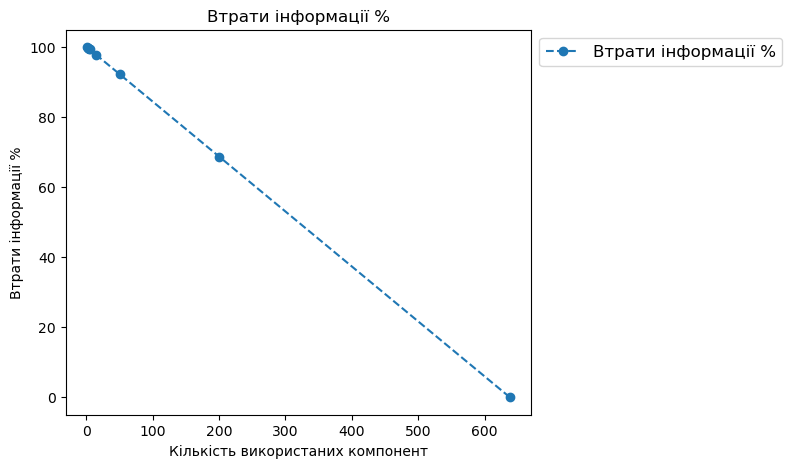

In [12]:
plt.figure(figsize = (6, 5))
plt.plot(x, percentage, 'o--', label = 'Втрати інформації %')
plt.title('Втрати інформації %')
plt.xlabel('Кількість використаних компонент')
plt.ylabel('Втрати інформації %')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

* **6**

Розміри початкового зображення: (638, 960)

Розміри матриць отриманих з np.linalg.svd(...):
 U.shape, S.shape, V.shape
(638, 638) (638,) (960, 960)

Список числа компонент: [638, 300, 75, 15, 5, 1] 



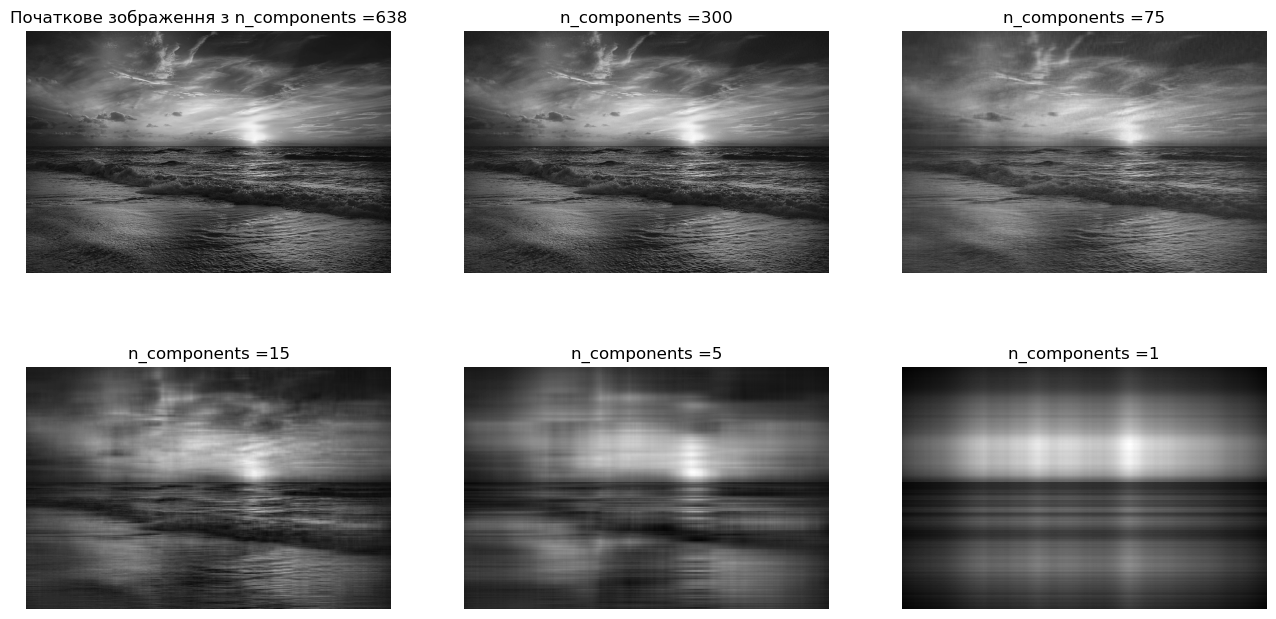

In [13]:
def plot_n_comp(name_img):
    # Завантажте вхідне зображення і перетвориіть в чорнобіле
    img = cv2.imread(name_img, 0)
    original_shape = img.shape
    print('Розміри початкового зображення:', original_shape)

    # Отримання svd
    U, S, V = np.linalg.svd(img)

    print('\nРозміри матриць отриманих з np.linalg.svd(...):\n U.shape, S.shape, V.shape')
    print(U.shape, S.shape, V.shape)

    # зображення з різною кількістю компонентів
    first = min(np.shape(img))
    components = [first, 300, 75, 15, 5, 1]
    print('\nСписок числа компонент:', components, '\n')
    
    plt.figure(figsize = (16, 8))
    for i in range(len(components)):
        low_rank = U[:, :components[i]] @ np.diag(S[:components[i]]) @ V[:components[i], :]
        if(i == 0):
            plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), \
            plt.title("Початкове зображення з n_components =" + str(components[i]))
        else:
            plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), \
            plt.title("n_components =" + str(components[i]))
        
        #matr.append(low_rank)
        #print()
        
plot_n_comp(name_img)

_______________________________________________________________________________________________________________